# Programming challenge
---

Welcome to the DD2421 ML Challenge.

In short, you must build and train a classifier given a labeled dataset and then use it to infer the labels of a given unlabeled evaluation dataset. You must then submit the inferred labels in a specified format, which will be compared to the ground truth. The accuracy of your model is proportional to the grade you receive. (Scaling will be done according to three parameters: a benchmark accuracy, a baseline accuracy, and a teacher's accuracy). Here's how the accuracy achieved on the evaluation dataset maps to the score it receives in the challenge: 

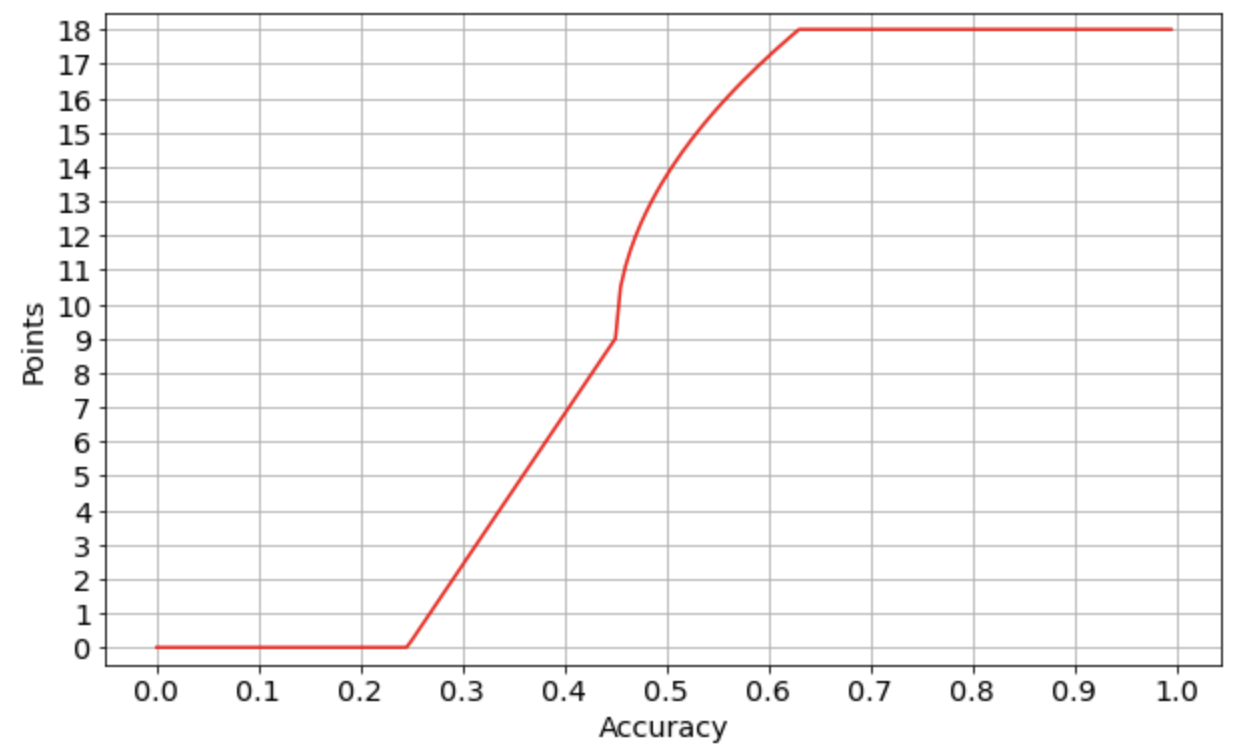

In [1]:
from IPython.display import Image
Image(filename='scoring.png') 

Some logistics:

* This challenge is to be done individually. The work you submit must be your own.
* You can use whatever programming language and libraries you want. The challenge is designed such that it does not require high computational resources, but you can use Google Colab (Links to an external site.) if you feel the need.
* The training and evaluation dataset files are formatted as comma-separated values, with each line being an observation. Like real data, there may be problems with some of the entries in the training dataset file.
* You must submit two things: 1) your code (a zipfile is fine, but NO OTHER compression, e.g., rar); 2) a text file where each line is ONLY the label inferred by your system in the same order as that of the evaluation dataset file. If you do not submit these TWO files you will receive ZERO.
* The labels your system generates must be exactly the same as those appearing in the training dataset. If you do not do this you will receive ZERO.
* Your label file should not contain a header or index column. If your label file has a header or index column, you will receive ZERO.
* You can only submit ONCE, so make sure the classifier you use in the end is the best you think you can create.
* No questions will be answered from the instructors. Ask the data!
* Use this opportunity to prepare for the take-home exam!

Training data: `TrainOnMe-2.csv`

Evaluation data: `EvaluateOnMe-2.csv`

Ground truth: TBR

### Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import validation_curve

In [4]:
# run block of code and catch warnings
import warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warnings

### Load data

In [5]:
df = pd.read_csv("TrainOnMe-2.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1002 non-null   object 
 1   y       996 non-null    object 
 2   x1      999 non-null    float64
 3   x2      999 non-null    float64
 4   x3      999 non-null    float64
 5   x4      999 non-null    float64
 6   x5      999 non-null    float64
 7   x6      999 non-null    float64
 8   x7      999 non-null    object 
 9   x8      999 non-null    float64
 10  x9      999 non-null    float64
 11  x10     999 non-null    float64
 12  x11     999 non-null    float64
 13  x12     999 non-null    object 
 14  x13     999 non-null    float64
dtypes: float64(11), object(4)
memory usage: 117.5+ KB


In [7]:
df['index']=pd.to_numeric(df['index'],errors='coerce') # make not numbers (in index column) NaN values

In [8]:
df = df[df['index'].notna()] # drop rows for previously made NaN values

In [9]:
df.head()

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.0,Shoogee,2.20274,-0.04690,-4.69816,-9.07800,10.13118,-0.08900,Erik Sven Williams,0.54191,0.52041,-5.66990,-0.93831,False,107.78776
1,1.0,Bob,2.01516,-0.12177,-4.24286,-9.79772,9.98259,-0.01485,Erik Sven Williams,-1.21671,1.18749,-9.25300,-1.21892,False,98.63633
2,2.0,Bob,0.02598,-0.24764,0.39977,-9.54167,10.53391,-0.27978,Erik Sven Williams,-2.39764,1.95167,-9.46447,-2.68910,True,1.49880
3,3.0,Jorg,0.39778,-0.83343,-2.14272,-9.06550,10.15047,-0.84583,Jerry från Solna,0.09768,0.92010,-11.17952,0.59877,False,18.81785
4,4.0,Jorg,1.25346,0.09320,1.54063,-9.33171,9.92016,0.09889,Jerry Fernström,-0.46134,0.16381,-12.07755,1.09106,True,63.44326


In [10]:
#Number of unique values for each variable
df.nunique()

index    999
y          4
x1       996
x2       999
x3       999
x4       992
x5       995
x6       999
x7         5
x8       998
x9       998
x10      998
x11      997
x12        2
x13      999
dtype: int64

In [11]:
#Create dict with code for each category
cat_dict = dict(enumerate(df['y'].astype('category').cat.categories))

#Transform categorical column "diagnosis" into numerical discrete 
df['y'] = df['y'].astype('category').cat.codes.astype('float')

print(cat_dict)

{0: 'Atsuto', 1: 'Bob', 2: 'Jorg', 3: 'Shoogee'}


In [12]:

#Create dict with code for each category
cat_dict = dict(enumerate(df['x7'].astype('category').cat.categories))

#Transform categorical column "diagnosis" into numerical discrete 
df['x7'] = df['x7'].astype('category').cat.codes.astype('float')

print(cat_dict)

{0: 'Erik Sven Fernström', 1: 'Erik Sven Williams', 2: 'Jerry Fernström', 3: 'Jerry Williams', 4: 'Jerry från Solna'}


In [13]:
df = df.drop(df[df['y']==-1].index) # erase rows where there is none of these three classes

In [14]:
#Create dict with code for each category
cat_dict = dict(enumerate(df['x12'].astype('category').cat.categories))

#Transform categorical column "diagnosis" into numerical discrete 
df['x12'] = df['x12'].astype('category').cat.codes.astype('float')

print(cat_dict) # some Flase values were directly "replaced" on the csv file

{0: False, 1: True}


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   995 non-null    float64
 1   y       995 non-null    float64
 2   x1      995 non-null    float64
 3   x2      995 non-null    float64
 4   x3      995 non-null    float64
 5   x4      995 non-null    float64
 6   x5      995 non-null    float64
 7   x6      995 non-null    float64
 8   x7      995 non-null    float64
 9   x8      995 non-null    float64
 10  x9      995 non-null    float64
 11  x10     995 non-null    float64
 12  x11     995 non-null    float64
 13  x12     995 non-null    float64
 14  x13     995 non-null    float64
dtypes: float64(15)
memory usage: 124.4 KB


In [16]:
pd.set_option('display.max_columns', None)
df.head()

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.0,3.0,2.20274,-0.04690,-4.69816,-9.07800,10.13118,-0.08900,1.0,0.54191,0.52041,-5.66990,-0.93831,0.0,107.78776
1,1.0,1.0,2.01516,-0.12177,-4.24286,-9.79772,9.98259,-0.01485,1.0,-1.21671,1.18749,-9.25300,-1.21892,0.0,98.63633
2,2.0,1.0,0.02598,-0.24764,0.39977,-9.54167,10.53391,-0.27978,1.0,-2.39764,1.95167,-9.46447,-2.68910,1.0,1.49880
3,3.0,2.0,0.39778,-0.83343,-2.14272,-9.06550,10.15047,-0.84583,4.0,0.09768,0.92010,-11.17952,0.59877,0.0,18.81785
4,4.0,2.0,1.25346,0.09320,1.54063,-9.33171,9.92016,0.09889,2.0,-0.46134,0.16381,-12.07755,1.09106,1.0,63.44326


As we can see, we have **transformed diagnosis into a numerical discrete variable, although keeping in mind its categorical nature**.

Descriptive statistics of the dataset

In order to summarize the main and most basic statistical characteristics of the dataset, we will use the method ***describe***.

In [17]:
df.describe()

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,995.000000,995.000000,995.000000,995.000000,995.000000,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,9.950000e+02,995.000000,995.000000
mean,499.655276,1.831156,0.982566,0.023618,-1.030506,-9.046144e+04,10.312663,0.026528,1.686432,-0.023860,0.000569,-8.678539,1.005025e+18,0.367839,48.613057
std,289.241714,0.956622,0.949277,0.694079,3.245027,2.853192e+06,0.273211,0.706240,1.161144,1.283839,1.418782,1.623066,3.170213e+19,0.482460,47.005128
min,0.000000,0.000000,-1.738210,-2.091310,-11.985670,-9.000000e+07,9.781430,-2.115920,0.000000,-5.271550,-5.259760,-14.571440,-6.000520e+00,0.000000,-87.163650
25%,248.500000,1.000000,0.360050,-0.452630,-3.217285,-9.467225e+00,10.095195,-0.456800,1.000000,-0.813975,-0.879965,-9.745025,-2.031350e+00,0.000000,17.944200
50%,500.000000,2.000000,0.967760,0.020070,-1.164630,-9.182040e+00,10.300000,0.025270,2.000000,-0.011360,0.019290,-8.648330,-1.179570e+00,0.000000,47.333140
75%,750.500000,3.000000,1.567290,0.491455,1.174935,-8.919690e+00,10.512735,0.502410,2.000000,0.779865,0.949200,-7.634435,-1.900600e-01,1.000000,77.740625
max,999.000000,3.000000,4.006740,1.873800,8.743360,-8.292200e+00,10.992940,1.949280,4.000000,4.038190,4.813840,-3.201190,1.000000e+21,1.000000,197.648100


Now we are going to see **how classes are distributed** across the dataset in order to determine if the dataset suffers from class imbalance. 

In [18]:
#Function to plot percentages on sns.countplot bars
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/home/lasito/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


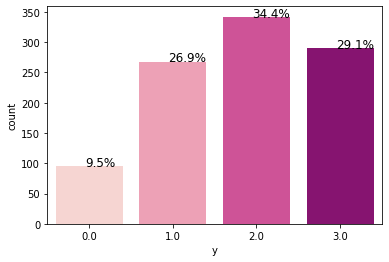

In [19]:
ax = sns.countplot(df['y'],label="count", palette="RdPu")

without_hue(ax, df['y'])

### Multivariate Analysis

#### Correlation

Now we are going to analyze the relationships between pairs of variables. Analyzing the correlation between variables can give us information about:
1. **How to handle missing data**: if two variables are highly correlated, they can be used to predict missing values among themselves. 
2. **Collinearity between variables**: linear models rely on the independency of the variables. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. This way, if there exists a significant relationship between predictors, coefficient estimations and predictions can be less precisse and less reliable. It also causes **overfitting** in linear regression analysis models. In our case, we are dealing with a classification problem and we will mainly use non-parametric models, so we won't be significantly affected by multicollinearity. 
3. **Redundant variables**: features that show a very high correlation may suppose adding redundant data to our analysis, since two predictors may be providing the same information about the response variable. We will further confirm this when variables are scaled.
4. **Find relevant relationships for interpretation of the analysis.**

To show correlation between features we will both display a **correlation matrix**, a **heatmap** (Pearson's Correlation Coefficient) and a **scatter plot**. 

In [20]:
df.corr()

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
index,1.000000,0.007167,-0.054754,-0.037542,0.032956,-0.038109,0.022336,-0.040901,0.053968,0.014384,-0.003445,-0.010943,-0.048785,0.006526,-0.054151
y,0.007167,1.000000,-0.000986,0.004177,0.023821,-0.005601,0.070392,-0.000673,-0.000615,-0.019811,-0.019669,0.193761,0.005601,0.001737,-0.000174
x1,-0.054754,-0.000986,1.000000,0.294348,-0.298462,-0.030565,0.029375,0.291063,-0.140384,0.043253,-0.015022,0.041715,0.033954,-0.205912,0.999457
x2,-0.037542,0.004177,0.294348,1.000000,-0.155504,-0.029925,0.026656,0.989823,-0.535591,0.007466,-0.006663,-0.047400,0.001424,0.034491,0.291853
x3,0.032956,0.023821,-0.298462,-0.155504,1.000000,0.003515,0.022178,-0.162952,0.078295,-0.050766,-0.008142,0.010903,0.000485,0.773552,-0.266857
x4,-0.038109,-0.005601,-0.030565,-0.029925,0.003515,1.000000,-0.005112,-0.038051,-0.008570,-0.031242,0.053210,-0.020976,0.001006,0.024195,-0.030742
x5,0.022336,0.070392,0.029375,0.026656,0.022178,-0.005112,1.000000,0.022532,-0.013427,0.036853,-0.020982,-0.052567,-0.044857,0.010825,0.030428
x6,-0.040901,-0.000673,0.291063,0.989823,-0.162952,-0.038051,0.022532,1.000000,-0.533242,0.006745,-0.005916,-0.043509,0.000119,0.027497,0.288279
x7,0.053968,-0.000615,-0.140384,-0.535591,0.078295,-0.008570,-0.013427,-0.533242,1.000000,-0.041360,0.010723,0.072272,0.008570,-0.023766,-0.139051
x8,0.014384,-0.019811,0.043253,0.007466,-0.050766,-0.031242,0.036853,0.006745,-0.041360,1.000000,0.048686,0.010341,-0.003471,-0.049380,0.041923


We can see that **this enormous correlation coefficient is difficult to analyze**. In order to make easier the analysis of correlation, **we will plot a heatmap**. This way, we can visually see the strength of the linear relationship between variables.

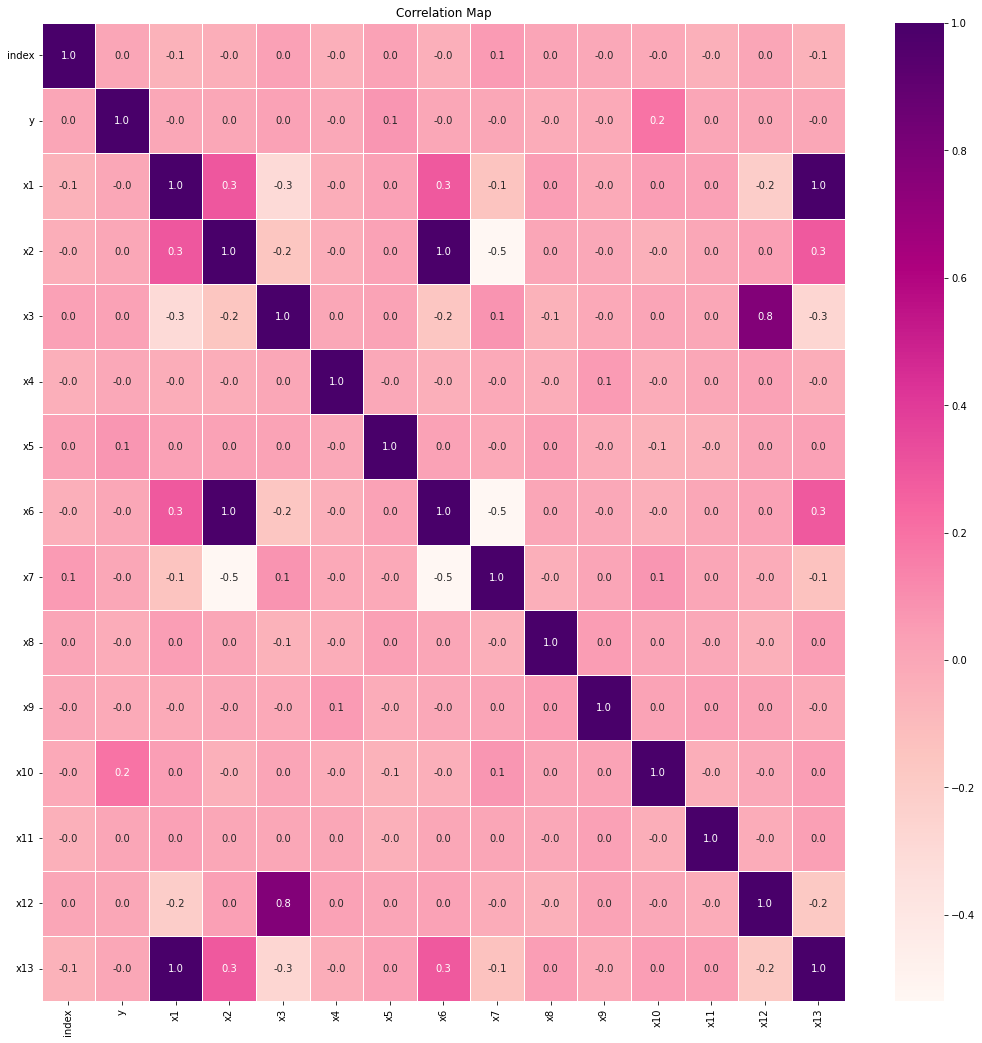

In [21]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=1,fmt = ".1f",ax=ax, cmap='RdPu' )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [22]:
df = df.drop('x13', 1) #keep 'x1' instead
df = df.drop('x6', 1) #keep 'x2' instead
df.describe()

/tmp/ipykernel_44206/1743585050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('x13', 1) #keep 'x1' instead
/tmp/ipykernel_44206/1743585050.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('x6', 1) #keep 'x2' instead


,index,y,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11,x12
count,995.000000,995.000000,995.000000,995.000000,995.000000,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,9.950000e+02,995.000000
mean,499.655276,1.831156,0.982566,0.023618,-1.030506,-9.046144e+04,10.312663,1.686432,-0.023860,0.000569,-8.678539,1.005025e+18,0.367839
std,289.241714,0.956622,0.949277,0.694079,3.245027,2.853192e+06,0.273211,1.161144,1.283839,1.418782,1.623066,3.170213e+19,0.482460
min,0.000000,0.000000,-1.738210,-2.091310,-11.985670,-9.000000e+07,9.781430,0.000000,-5.271550,-5.259760,-14.571440,-6.000520e+00,0.000000
25%,248.500000,1.000000,0.360050,-0.452630,-3.217285,-9.467225e+00,10.095195,1.000000,-0.813975,-0.879965,-9.745025,-2.031350e+00,0.000000
50%,500.000000,2.000000,0.967760,0.020070,-1.164630,-9.182040e+00,10.300000,2.000000,-0.011360,0.019290,-8.648330,-1.179570e+00,0.000000
75%,750.500000,3.000000,1.567290,0.491455,1.174935,-8.919690e+00,10.512735,2.000000,0.779865,0.949200,-7.634435,-1.900600e-01,1.000000
max,999.000000,3.000000,4.006740,1.873800,8.743360,-8.292200e+00,10.992940,4.000000,4.038190,4.813840,-3.201190,1.000000e+21,1.000000


### Pre-processing of the Data Set
#### Missing Values

In [23]:
df.isnull().values.any()

False

In [24]:
X = df.loc[:, 'x1':]
y = df['y']

#Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)#,random_state = 2)

#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/home/lasito/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


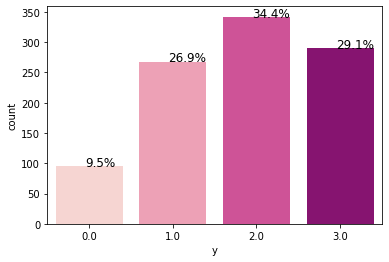

In [25]:
ax = sns.countplot(df['y'],label="count", palette="RdPu")

without_hue(ax, df['y'])

### Class Balancing
We will check if class balancing provides better performance results, since we could introduce bias in our analysis. By undersampling, since we do not have a big dataset, we would loos a huge quantity of data. Therefore, we will use a methdod for class balancing called **SMOTE**. It is an oversampling method that synthetically adds new samples for the minority class. 

As an example in 2D, for each observation that belongs to the under-represented class, the algorithm gets its K-nearest-neighbors and synthesizes a new instance of the minority label at a random location in the line between the current observation and its nearest neighbor. 


In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=3)#, random_state=2)
X_res, y_res = sm.fit_resample(X, y)

In [27]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res)#, random_state = 2)

#Scale data
X_train_res= scaler.fit_transform(X_train_res)
X_test_res = scaler.fit_transform(X_test_res)

In [28]:
lr = LogisticRegression(solver='liblinear')
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nn = MLPClassifier()
rf = RandomForestClassifier()
svm_poly = SVC(kernel='poly')#,random_state=2)
grad_boost= GradientBoostingClassifier()
extra_trees= ExtraTreesClassifier()
adaboost= AdaBoostClassifier()
bagging= BaggingClassifier()
sgd=SGDClassifier()
nb= GaussianNB()


models = [lr, kn, dt, nn, rf, svm_poly, grad_boost, extra_trees, adaboost, bagging, sgd, nb]
models_names=['Logistic Regression', 'KNN', 'Decision Tree', "ANN", "Random Forest", "svm_poly", "grad_boost", "extra_trees", "adaboost", "bagging", "SGD","NB"]
train_accuracy = []
cv_accuracy=[]
test_accuracy=[]
data=[[X_train, X_test, y_train, y_test], [X_train_res, X_test_res, y_train_res, y_test_res]]

for dataset in data:
    
    train_accuracy_i=[]
    cv_accuracy_i=[]
    test_accuracy_i=[]
    
    for model in range(len(models)):
        model_ = clone(models[model])
        model_.fit(dataset[0], dataset[2])
        
        #--Train scores
        y_pred_train = model_.predict(dataset[0])
        train_accuracy_i.append(accuracy_score(dataset[2], y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model_, dataset[0], dataset[2], scoring=["accuracy"] , return_train_score=True)
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
                           
        #--Test scores
        y_pred_test = model_.predict(dataset[1])
        test_accuracy_i.append(accuracy_score(dataset[3], y_pred_test))
    
    train_accuracy.append(train_accuracy_i)
    cv_accuracy.append(cv_accuracy_i)
    test_accuracy.append(test_accuracy_i)
    
original_df = pd.DataFrame(list(zip(train_accuracy[0], cv_accuracy[0], test_accuracy[0])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
original_df.index=models_names
                             
balanced_df = pd.DataFrame(list(zip(train_accuracy[1], cv_accuracy[1], test_accuracy[1])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
balanced_df.index=models_names


/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

In [29]:
original_df

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,0.400335,0.365210,0.407035
KNN,0.618090,0.388613,0.374372
Decision Tree,1.000000,0.480756,0.361809
ANN,0.748744,0.485602,0.449749
Random Forest,1.000000,0.485588,0.454774
svm_poly,0.562814,0.365112,0.389447
grad_boost,0.979899,0.493978,0.449749
extra_trees,1.000000,0.484076,0.442211
adaboost,0.477387,0.435336,0.391960
bagging,0.978224,0.477297,0.396985


In [30]:
balanced_df

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,0.377193,0.354781,0.318713
KNN,0.641326,0.474629,0.497076
Decision Tree,1.000000,0.486332,0.511696
ANN,0.701754,0.567260,0.426901
Random Forest,1.000000,0.590618,0.599415
svm_poly,0.554581,0.422984,0.432749
grad_boost,0.884016,0.544831,0.561404
extra_trees,1.000000,0.622789,0.502924
adaboost,0.538012,0.465887,0.502924
bagging,0.971735,0.536027,0.535088


Since we **obtained better results after balancing data**, we will retain this new dataset for further analysis.

In [31]:
X_train, X_test, y_train, y_test = X_train_res, X_test_res, y_train_res, y_test_res

### Supervised or Unsupervised Learning

Since the purpose of the analysis of this dataset is to determine the presence of malignancy in a tisse based on the characteristics of the their nuclei given a set of observations with their corresponding labels, **we will primarily perfrom supervised learning**. This is, we will train a model with labelled observations which will learn the underlying pattern of the data useful to predict labels correctly by minimizing a cost function that takes into account both predicted and current labels. 

Unsupervised learning is used when data is unlabelled, or when we want to get some insight into the distribution of the data when performing exploratory analysis.

We will train four different models corresponding to **Logistic Regression, KNN, Decision Tree and Neural Networks Classifier algorithms**. First, we will tune hyperparameters and analyze validation curves to avoid overfitting and get the best performance metrics. Then, we will train the models with the best parameters found and once obtained the results, we will interpret and discuss them.


#### Hyperparameter Tuning

**Hyperparameters** are by definition input parameters which are required by an algorithm to learn from data. They **help estimate model parameters** by controlling the learning process of the model and they must be set and tuned manually.

Hyperparameter tuning refers to the process of finding the hyperparameters values for our model to optimally learn from the data. In order to find them, we will use the function **GridSearchCV**. This function helps to find the best hyperparameters by looking for the parameters that provide the best cv scores, according to a predefined score, such as accuracy. In fact, since we are dealing with a classification problem, we will use score **accuracy** to find the best hyperparameters.

For some hyperparameters, such as the number of neighbors, we will have to introduce a range of values to the grid search. In order to avoid overfitting, we will **select ranges of grid params by analyzing validation curves**. Validation curves allow us to find those ranges that provide the best and closest scores for validation and train.

The more the hyperparameters of an algorithm you introduce to the grid seach, the slower the tuning process, since GridSearchCV trains and test every combination of parameters. Therefore, it is desirable to choose a small subset of hyperparameters to search.

##### Logistic Regression

Parameters we will tune for Logistic Regression Classifier:
- **Penalty**: norm used for regularization. We will choose between **L1** and **L2**.  <br>
- **C**: this is the regularization parameter ($C=\frac{1}{\lambda}$). It controls the penalty strength ($\text{regularization strength}= \lambda=\frac{1}{C}$). The larger the C value, the less penalty for the regularization norm L1 or L2. C must be greater than 0. Default is 1, so in this case we will select a range of C for search accorcding to the validation curve for this parameter. 

Solver: we will use ***liblinear*** as the model for Logistic Regression. This method is recommended for high dimensional datasets, as in our case. This solver uses **coordinate descent (CD)** algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. It was the one used as default for LogisticRegression() before it was replaced by lbfgs. Furthermore, it can handle both L1 and L2 penalty, whereas lbfgs only handles L1.

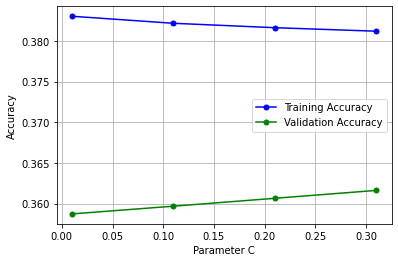

In [32]:
#Validation curve for Logistic Regression parameter C
param_range = np.arange(0.01, 0.4, 0.1)

train_scores, test_scores = validation_curve(estimator=LogisticRegression(), 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='C', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

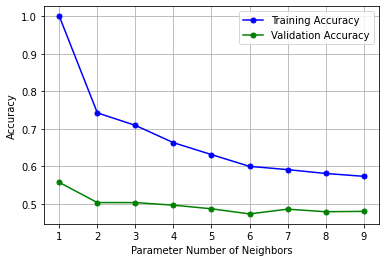

In [33]:
#Validation curve for KNN Classifier parameter "n_neighbors"
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(estimator= kn, 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='n_neighbors', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.legend()
plt.show()

#### Decision Tree Classifier

Parameters we will tune for Decision Tree Classifier:
- **Criterion**: this determines the function that will be used to consider the quality of split. We will choose between **Gini** and **Entropy**, which correspond to Gini Index and Information Gain methods, respectively.
- **Max Depth of the tree**: this parameter determines the maximum depth of the tree. 
- **Min Samples per split**: this parameter determines the minimum number of samples required to split an internal node.

The last two parameters determine the complexity of the tree and they are usually tuned in order to avoid overfitting. To select the ranges we will search, we are going to visualize validation curves for both variables.

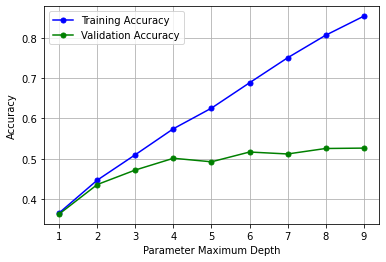

In [34]:
#Validation curve for Decision Tree Classifier parameter "max_depth"
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(estimator= dt, 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='max_depth', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.legend()
plt.show()

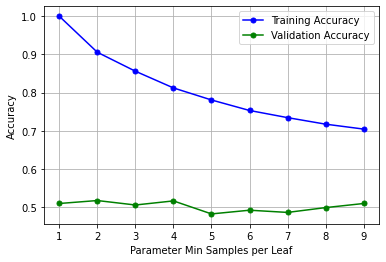

In [35]:
#Validation curve for Decision Tree Classifier parameter "min_samples_leaf"
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(estimator= DecisionTreeClassifier(), 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='min_samples_leaf', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.legend()
plt.show()

##### Neural Network Classifier

Parameters we will tune for Neural Network Classifier are:
- **Size of Hidden Layers**: this parameter determines the size of the ith layer, this is, the number of neurons in the ith layer. To determine the number of layers and we will use validation curves. Usually, there is a common rule-of-thumb that says that the optimal size of hidden layers is usually between the size of the input and the size of the output layers, in our case 30 and 2, respectively. Therefore, we will use a validation curve to select number of hidden layers with number of neurons 2/3 the size of the input layer, plus the size of the output layer (another rule-of-thumb). Then number of neurons will be equal to 22.
- **Solver**: we will choose solver between **sgd** and **adam**. Sgd corresponds to stochastic gradient descent and adam corresponds to an optimized version of the stochastic gradient descent. 
- **Activation function**: this is the activation function for the last hidden layer. We will choose between **logistic, tanh and relu** functions. 

/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

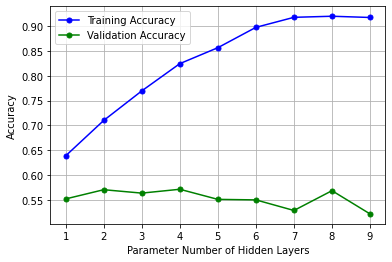

In [36]:
#Validation curve for MLP Classifier parameter "hidden_layer_sizes"

#For two hidden layers, each with 22 neurons, it will be (22,22)

param_range = [(22,)]

for element in range(2,10,1):
    param_range.append(param_range[0]*element)

train_scores, test_scores = validation_curve(estimator= MLPClassifier(), 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='hidden_layer_sizes', param_range=param_range)
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#

x_range=range(len(param_range))
x_range=[x+1 for x in x_range]

plt.plot(x_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(x_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(x_range)
plt.grid()
plt.legend()
plt.show()

##### Random Forest Classifier

Parameters we will tune for Random Forest:
1. **Criterion**: as we said with decision trees, we will choose between **gini and entropy**.
2. **Maximum depth of the tree**
3. **Min Samples per Split**

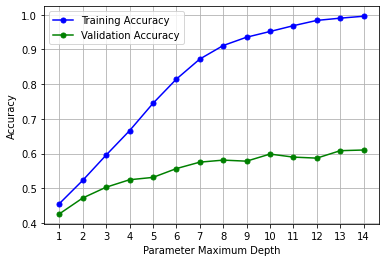

In [37]:
#Validation curve for Random Forest Classifier parameter "max_depth"
param_range = np.arange(1,15,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(), 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='max_depth', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.legend()
plt.show()

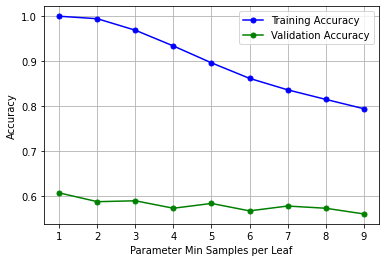

In [38]:
#Validation curve for Random Forest Classifier parameter "min_samples_leaf"
param_range = np.arange(1,10,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(), 
                                             X=X_train, y=y_train,
                                             cv=10, 
                                             param_name='min_samples_leaf', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.legend()
plt.show()

Now we have determined all our hyperparameter ranges and possible values, we will proceed to find the best for each model.


#### <span style="color:#DB8AC4">Hyperparameter GridSearchCV</span>

In [39]:
#random_state=2


models_names=['Logistic Regression', 'KNN', 'Decision Tree', "ANN", "Random Forest","svm_poly", "grad_boost", "extra_trees", "adaboost", "bagging", "SGD"]

clfs= [lr, kn, dt, nn, rf, svm_poly, grad_boost, extra_trees, adaboost, bagging, sgd]

n_samples = X.shape[0]
n_features = X.shape[1]
params={0: {'penalty':['l1', 'l2'], 'C': np.arange(0.01, 0.2, 0.01)}, 
        1: {'n_neighbors':np.arange(1, 5, 1), 'metric':['euclidean','manhattan'], 'weights': ['uniform', 'distance']},
        2: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,10,2), 'min_samples_leaf': np.arange(1,10,2)}, 
        3: {'hidden_layer_sizes':[(10,30,10),(20), (20,20), (30,30), (40,40)], 'solver':['sgd', 'adam'], 'activation':['logistic', 'tanh', 'relu']},
        4: {'criterion':['gini', 'entropy'], 'bootstrap': [True, False], 
            'max_depth': [5, 10, 20, 30, 50, 75, 100, None], 
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],
            'n_estimators': [10, 35, 50, 75 , 100]},
        5: {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
        6: {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),'n_estimators':range(20,81,10), 'min_samples_leaf':range(30,71,10)},
        7: {'n_estimators': [10, 25, 50, 75, 100],'max_features':['sqrt', 'log2'],'min_samples_leaf': range(1,50,5), 'min_samples_split': range(1,36,5)},
        8: {'base_estimator':[lr, dt, rf, extra_trees, nb]
            ,'n_estimators':[10, 50, 100], 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]},
        9: {'n_estimators': [20,50,100],'max_samples': [0.5, 1.0, n_samples//2, ],'max_features': [0.5, 1.0, n_features//2, ],'bootstrap': [True, False],'bootstrap_features': [True, False]},
        10:{'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'penalty':['l1', 'l2', 'elasticnet'], 'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
            'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
            'eta0':[1, 10, 100] } 
       }

def Grid_Search_cv(model_index, X, y):
    print(models_names[model_index]+'...')
    
    grid = GridSearchCV(clfs[model_index], params[model_index], verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)
    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

In [40]:
best_params_lr = Grid_Search_cv(0, X_train, y_train)
best_params_kn = Grid_Search_cv(1, X_train, y_train)
best_params_dt = Grid_Search_cv(2, X_train, y_train)

Logistic Regression...
KNN...
Decision Tree...


In [41]:
best_params_nn = Grid_Search_cv(3, X_train, y_train)

ANN...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
best_params_rf = Grid_Search_cv(4, X_train, y_train)

Random Forest...


In [43]:
best_params_svm_poly = Grid_Search_cv(5, X_train, y_train)

svm_poly...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

In [44]:
best_params_grad_boost = Grid_Search_cv(6, X_train, y_train)

grad_boost...


In [45]:
best_params_extra_trees = Grid_Search_cv(7, X_train, y_train)

extra_trees...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

    job = self._backend.apply_async(batch, callback=cb)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 171, in _parallel_build_trees
    tree.fit(X, y, sample_weight=sample_weight, check_input=False)
  File "/home/lasito/.local/lib/python3.8/site-packages/skle

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.5779588  0.61013024 0.63256453 0.62669666 0.63061804 0.63841819
 0.59359697 0.61692636 0.62964243 0.63060857 0.62768648 0.62965664
 0.56532797 0.60917831 0.62768174 0.6169453  0.63157471 0.6364717
 0.57307601 0.60232536 0.61109164 0.63451101 0.62574473 0.63061331
 0.56925408 0.61013498 0.60040729 0.61892967 0.6305991  0.61991002
 0.55847502 0.59162207 0.60623254 0.61987686 0.61892493 0.61891073
        nan        nan        nan        nan        nan        nan
 0.55065593 0.57410372 0.57992896 0.58968979 0.60524745 0.60523798
 0.56919725 0.57113426 0.58481175 0.60331991 0.60818849 0.6023443
 0.54482595 0.56140658 0.58578735 0.59552451 0.60918305 0.60527113
 0.53508406 0.57213355 0.58576841 0.59262136 0.59456784 0.61014918
 0.57796353 0.57506986 0.58576841 0.59553872 0.582

In [46]:
best_params_adaboost = Grid_Search_cv(8, X_train, y_train)

adaboost...


In [47]:
best_params_bagging = Grid_Search_cv(9, X_train, y_train)

bagging...


In [48]:
best_params_sgd = Grid_Search_cv(10, X_train, y_train)

SGD...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lasito/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/lasito/.local/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.a

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

In [50]:
best_params_=[best_params_lr, best_params_kn, best_params_dt, best_params_nn, best_params_rf, 
              best_params_svm_poly, best_params_grad_boost, best_params_extra_trees,
              best_params_adaboost, best_params_bagging, best_params_sgd]

for i in range(len(models_names)):
    print(" ")
    print('\033[1m' + 'Best parameter for ' + str(models_names[i]) +'\033[0m')
    print(best_params_[i])
    

 
Best parameter for Logistic Regression
{'C': 0.04, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
 
Best parameter for Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
 
Best parameter for ANN
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08

#### Model Training

Now we have obtained the best hyperparameters, we will get the performance metrics of the optimized models, comparing the results with those from models without hyperparameter tuning. 

In [51]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

from joblib import dump, load 
for ix in range(len(models_names)):
    print(models_names[ix]+'...')
    
    original_model=clone(clfs[ix])
    
    optimized_model=clone(clfs[ix]).set_params(**best_params_[ix])
    
    models=[optimized_model, original_model]
    
    tuned_string= '_tuned'
    for model in models:
        
        model = clone(model)
        
        model.fit(X_train, y_train)
        
        filename= models_names[ix]
        dump(model, 'clsf_'+filename+str(tuned_string)+'.sav')
        
        #--Train scores
        y_pred_train = model.predict(X_train)
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model, X_train, y_train, scoring=["accuracy"])
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        
        #--Test scores
        y_pred_test = model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        
        tuned_string= '_original'

Logistic Regression...
KNN...
Decision Tree...
ANN...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lasito/.local/lib/python3.8/site-packages/skle

Random Forest...
svm_poly...


/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/lasito/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration

grad_boost...
extra_trees...
adaboost...
bagging...
SGD...


In [55]:
# * : tuned
index_names=['LR *', 'LR', 'KNN *', 'KNN', 
            'DT *', 'DT', 'ANN *', 'ANN','Random Forest*', 'Random Forest', 
             "SVM *","SVM", "Grad_Boost *", "Grad_Boost", "extra_trees*","extra_trees",
             "Adaboost*","Adaboost", "Bagging*", "Bagging", "SGD *", "SGD"]

ht_results = pd.DataFrame(list(zip(train_accuracy, cv_accuracy, test_accuracy)), columns=["Train Accuracy","Validation Accuracy", "Test Accuracy"])
ht_results.index=index_names
ht_results

,Train Accuracy,Validation Accuracy,Test Accuracy
LR *,0.387914,0.365456,0.336257
LR,0.377193,0.354781,0.318713
KNN *,1.000000,0.540924,0.555556
KNN,0.641326,0.474629,0.497076
DT *,0.741715,0.518508,0.511696
DT,1.000000,0.493166,0.517544
ANN *,0.777778,0.576012,0.441520
ANN,0.703704,0.568212,0.429825
Random Forest*,1.000000,0.592588,0.593567
Random Forest,1.000000,0.588695,0.602339


---

### Load trained models

In [61]:
clsf=load('clsf_Random Forest_original.sav')
y_pred= clsf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6023391812865497

Same results as previously reported! Classifier was correctly saved

#### Evaluate model
Make predictions for assignment

In [62]:
df_evaluate = pd.read_csv("EvaluateOnMe-2.csv")
df_evaluate= df_evaluate.drop('index', axis=1)
df_evaluate= df_evaluate.drop('x13', axis=1)
df_evaluate= df_evaluate.drop('x6', axis=1)

#Create dict with code for each category
cat_dict = dict(enumerate(df_evaluate['x7'].astype('category').cat.categories))
#Transform categorical column "diagnosis" into numerical discrete 
df_evaluate['x7'] = df_evaluate['x7'].astype('category').cat.codes.astype('float')
print(cat_dict)

#Create dict with code for each category
cat_dict = dict(enumerate(df_evaluate['x12'].astype('category').cat.categories))
#Transform categorical column "diagnosis" into numerical discrete 
df_evaluate['x12'] = df_evaluate['x12'].astype('category').cat.codes.astype('float')
print(cat_dict) # some Flase values were directly "replaced" on the csv file

df_evaluate.describe()

{0: 'Erik Sven Fernström', 1: 'Erik Sven Williams', 2: 'Jerry Fernström', 3: 'Jerry Williams', 4: 'Jerry från Solna'}
{0: False, 1: True}


,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11,x12
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.007617,0.001836,-0.947615,-9.216651,10.324396,1.70280,-0.015335,0.004067,-8.649969,-0.826802,0.382300
std,0.992236,0.710160,3.195209,0.378542,0.264752,1.16688,1.247145,1.370280,1.562513,1.732420,0.485974
min,-3.140490,-2.480970,-12.526530,-10.254440,9.768890,0.00000,-4.816350,-5.841980,-14.125110,-7.048840,0.000000
25%,0.361215,-0.475140,-3.104055,-9.489180,10.118253,1.00000,-0.816637,-0.894505,-9.669930,-1.918547,0.000000
50%,1.008595,0.002950,-0.962210,-9.208670,10.302975,2.00000,-0.000440,0.016015,-8.614350,-1.027590,0.000000
75%,1.678185,0.473235,1.153828,-8.940660,10.517008,2.00000,0.776050,0.915255,-7.604775,0.007895,1.000000
max,4.640550,3.175240,11.852590,-8.282120,11.027380,4.00000,5.278490,5.608660,-3.113120,5.954120,1.000000


In [63]:
X_valid = df_evaluate.loc[:, 'x1':]

#Scale data
scaler = StandardScaler()
X_valid = scaler.fit_transform(X_valid)
X_valid.shape

(10000, 11)

In [64]:
y_pred= clsf.predict(X_valid)
y_pred_char=[]
for pred in y_pred:
    if pred==0:
        y_pred_char.append('Atsuto')
    if pred==1:
        y_pred_char.append('Bob')
    if pred==2:
        y_pred_char.append('Jorg')
    if pred==3:
        y_pred_char.append('Shoogee')
np.shape(y_pred_char)

(10000,)

In [65]:
np.savetxt('results_evaluation_.csv', y_pred, delimiter=',')
import csv
with open('results_evaluation.csv', 'w') as csvfile:
    for pred in y_pred_char:
        csvfile.write(pred + '\n')

---
Laso, Pablo <br> 19990422-T315 <br> plaso@kth.se